# Part-1: Exploratory Data Analysis
learning ref: https://www.youtube.com/watch?v=ioN1jcWxbv8; \
https://www.kaggle.com/biphili/feature-slection-lasso-ridge-linear-models \
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py \
https://www.kaggle.com/nitinkrsingh/advance-house-price-prediction/notebook; \
https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499; \
https://www.kaggle.com/markct/housing-price-prediction/notebook; \
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

### Step-1. View and Explore the data

In [1]:
import pandas as pd
import numpy as np

dataset=pd.read_csv('/Users/suravi.mandal/selected.csv')
 
# print shape of dataset with rows and columns
print(dataset.shape)


(1460, 23)


In [2]:
# print the top2recordsclear
dataset.head(5)

,Id,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,...,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition,SalePrice
0,1,0.235294,0.75,0.636364,0.666667,0.098361,0.0,0.75,0.25,1.00,...,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.50,1.0,0.75,12.247694
1,2,0.000000,0.75,0.500000,0.555556,0.524590,0.0,0.75,1.00,1.00,...,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75,12.109011
2,3,0.235294,0.75,0.636364,0.666667,0.114754,0.0,0.75,0.50,1.00,...,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75,12.317167
3,4,0.294118,0.75,0.727273,0.666667,0.606557,0.0,0.50,0.25,0.75,...,0.333333,0.666667,0.333333,0.8,0.4,0.333333,0.75,1.0,0.00,11.849398
4,5,0.235294,0.75,1.000000,0.777778,0.147541,0.0,0.75,0.75,1.00,...,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.75,1.0,0.75,12.429216


### Step-2. Missing Value Analysis
What all are the Missing Data feature, the relationship with missing data and target data. Heatmap is one good technique to visualise missing values on large data sets.

In [5]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as IPython
from IPython import get_ipython
ipy = get_ipython()
dataset=pd.read_csv('/Users/suravi.mandal/selected.csv')

features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean()*100, 4),  ' % missing values')

In [6]:
#Find total number of missing values
dataset[dataset.columns[dataset.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [7]:
##Explore the relationship between missing values and Sales Price
for feature in features_with_na:
   data = dataset.copy()
  
   # 1 indicate the observed value is missing and 0 indicates the observed value is not-missing
   data[feature] = np.where(data[feature].isnull(), 1, 0)
  
 
   # calculate the mean SalePrice for the  missing vs present values
   data.groupby(feature)['SalePrice'].median().plot.bar()
   plt.title('MissingFeatureAnalysis')
   plt.show()

## Step-3 Find the Numerical Features

In [8]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print('Total number of numerical features: ', len(numerical_features))
dataset[numerical_features].head(2)

Total number of numerical features:  23


,Id,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,...,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition,SalePrice
0,1,0.235294,0.75,0.636364,0.666667,0.098361,0.0,0.75,0.25,1.0,...,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.5,1.0,0.75,12.247694
1,2,0.000000,0.75,0.500000,0.555556,0.524590,0.0,0.75,1.00,1.0,...,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.5,1.0,0.75,12.109011


### One thing to note here is that the following features are dispalyed as numerial but actually these are categorical features: MoSold, MSSubClass,

# Explore the Skewness of Numerical Features
Skewness: Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

For {'Id'} Skewness is {0.0}
For {'MSSubClass'} Skewness is {1.41}
For {'MSZoning'} Skewness is {-1.55}
For {'Neighborhood'} Skewness is {0.23}
For {'OverallQual'} Skewness is {0.22}
For {'YearRemodAdd'} Skewness is {0.5}
For {'RoofStyle'} Skewness is {1.45}
For {'BsmtQual'} Skewness is {-0.47}
For {'BsmtExposure'} Skewness is {1.1}
For {'HeatingQC'} Skewness is {-0.54}
For {'CentralAir'} Skewness is {-3.53}
For {'1stFlrSF'} Skewness is {0.08}
For {'GrLivArea'} Skewness is {-0.01}
For {'BsmtFullBath'} Skewness is {0.6}
For {'KitchenQual'} Skewness is {0.39}
For {'Fireplaces'} Skewness is {0.65}
For {'FireplaceQu'} Skewness is {0.22}
For {'GarageType'} Skewness is {-1.03}
For {'GarageFinish'} Skewness is {0.12}
For {'GarageCars'} Skewness is {-0.34}
For {'PavedDrive'} Skewness is {-3.31}
For {'SaleCondition'} Skewness is {-2.4}
For {'SalePrice'} Skewness is {0.12}


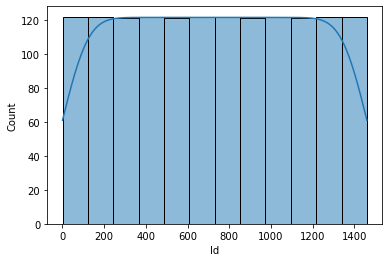

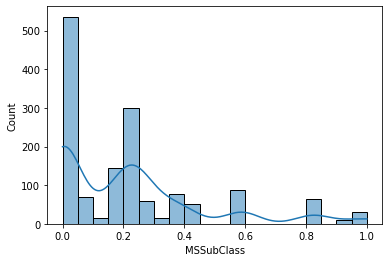

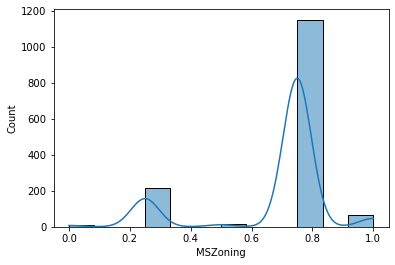

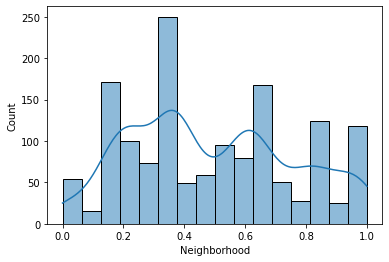

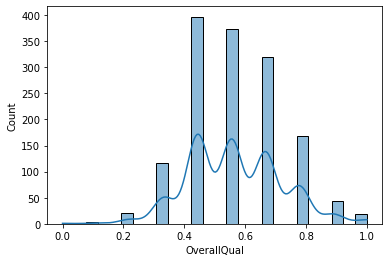

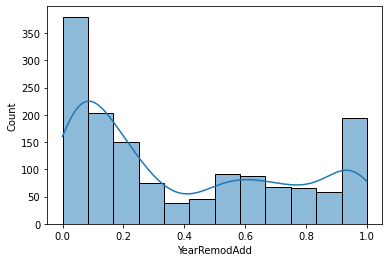

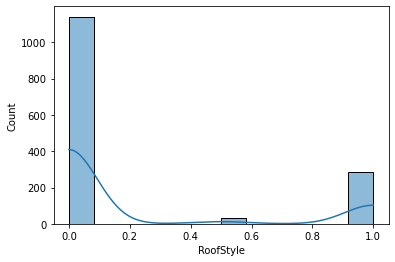

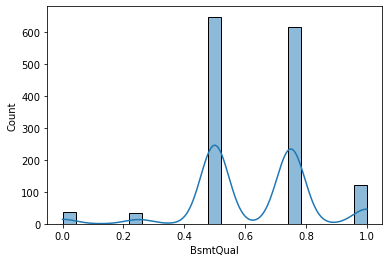

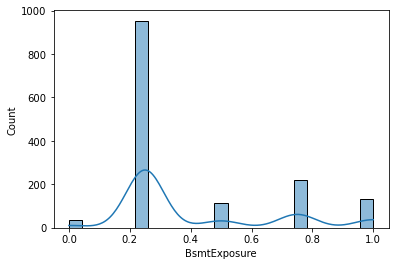

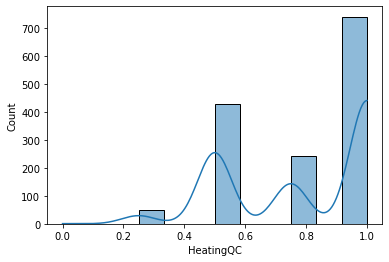

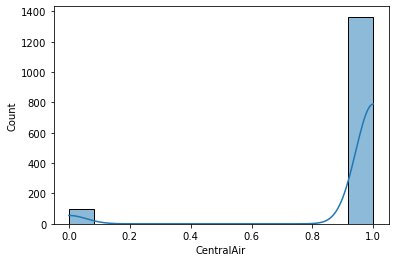

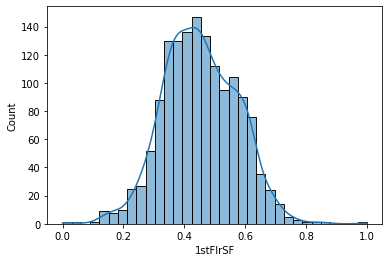

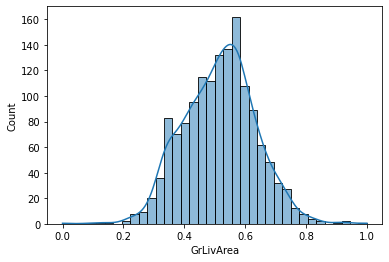

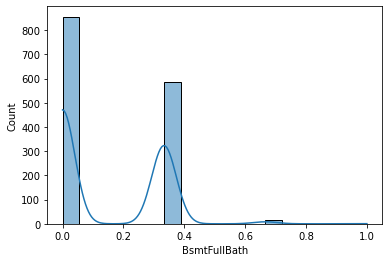

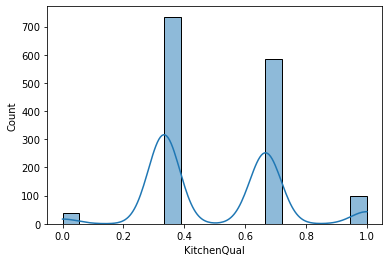

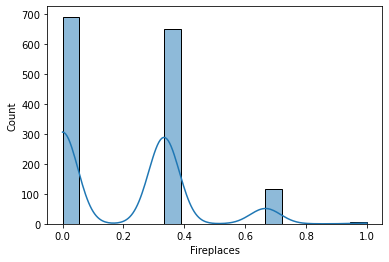

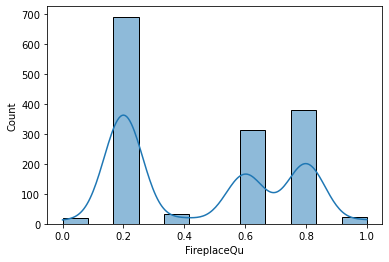

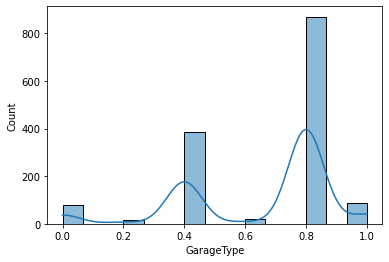

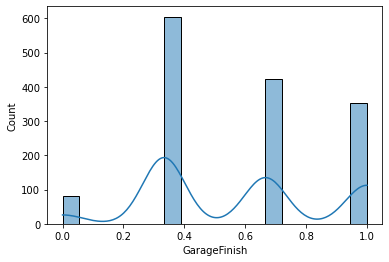

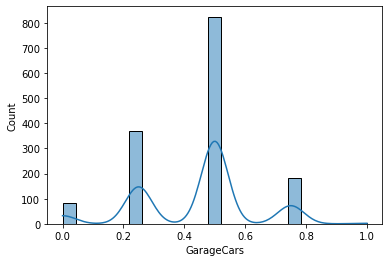

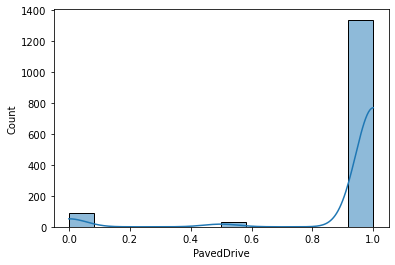

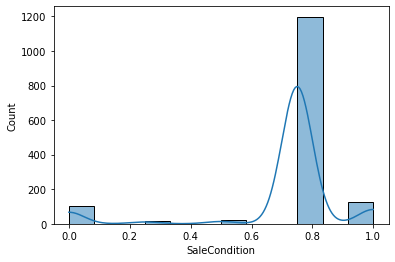

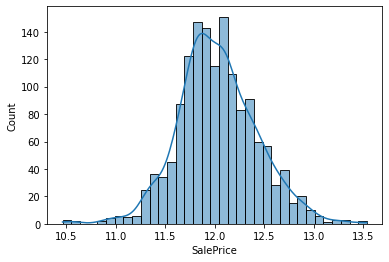

In [9]:
for i in numerical_features:
    print('For', {i}, 'Skewness is', {round(dataset[i].skew(),2)})
    

#plotting histplot for dataset to check skewness.
for i in numerical_features:
    sns.histplot(dataset[i], kde=True)
    plt.show()


## Step-4 Explore the Temporal/Datetime Variables

In [10]:
##Step-4.1 find the Temporal\Datetime features from the numerical features
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

#view the top 10 records data to understand the kind of values for these temporal features
print(dataset[year_feature].head(10))

   YearRemodAdd
0      0.098361
1      0.524590
2      0.114754
3      0.606557
4      0.147541
5      0.245902
6      0.049180
7      0.606557
8      0.967213
9      0.967213


YearRemodAdd


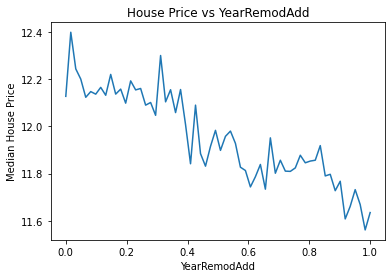

In [11]:
##Step-4.2 Explore the relation between the Temporal Feature variable compared to the SalesPrice variable

for elem in year_feature:
    print(elem)
    dataset.groupby(elem)['SalePrice'].median().plot()
    plt.xlabel(elem)
    plt.ylabel('Median House Price')
    plt.title("House Price vs " + elem)
    plt.show()

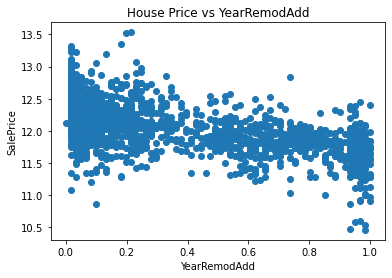

In [15]:
#Step-4.3 Explore the SalesPrice impact for all the year variable as compared to when the house was sold

for element in year_feature:
    if element!='YrSold':
        data=dataset.copy()
        data[element]=data[element]
        plt.scatter(data[element],data['SalePrice'])
        plt.xlabel(element)
        plt.ylabel('SalePrice')
        plt.title("House Price vs " + element)
        plt.show()

## Step-5 Lets Explore the Continous Numerical Features

Total Number of Continuous feature is 3


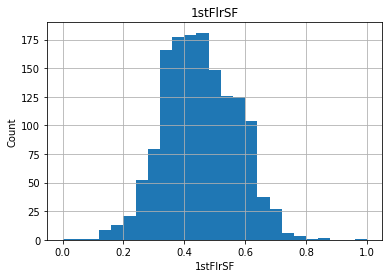

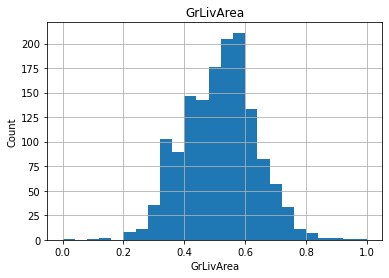

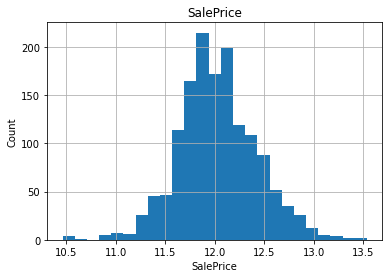

In [16]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]


continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Total Number of Continuous feature is {}".format(len(continuous_feature)))
 
#analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

##  Step-5 Lets Explore the Discrete Numerical Features

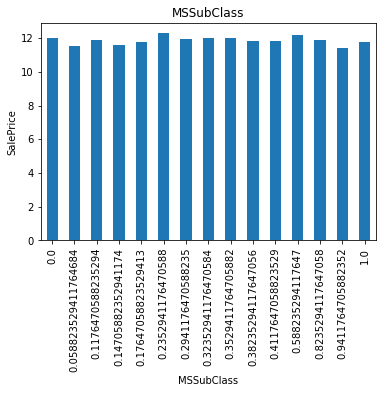

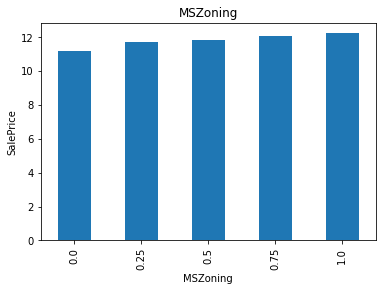

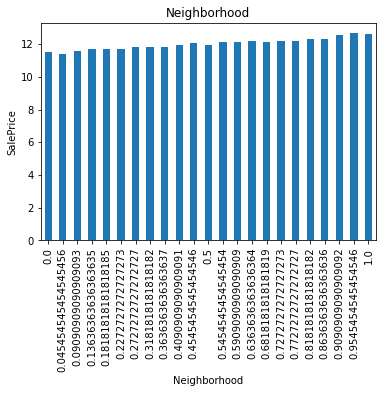

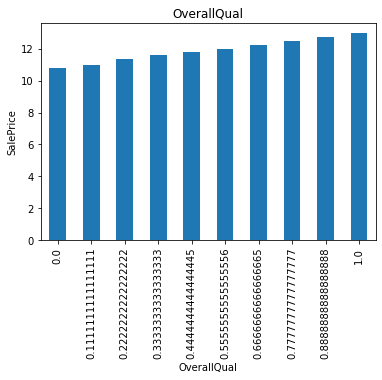

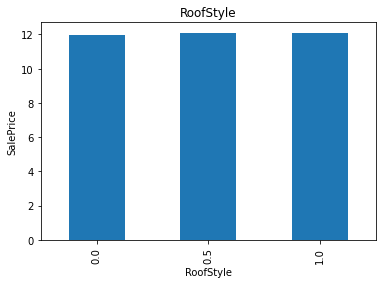

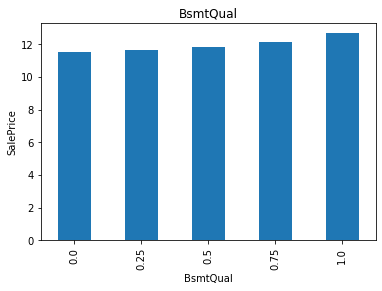

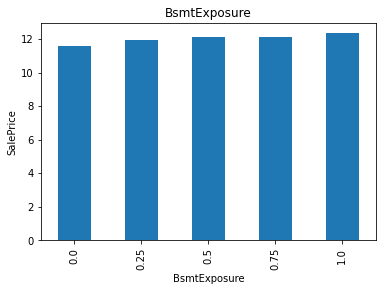

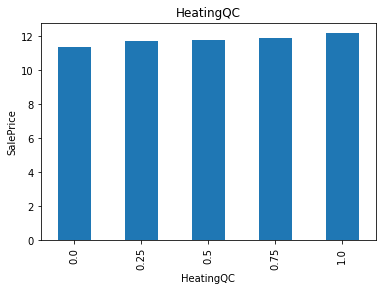

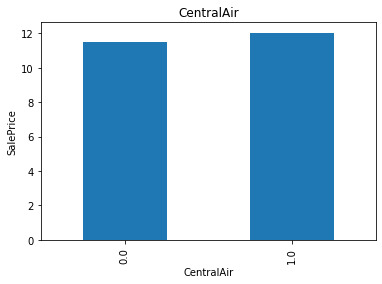

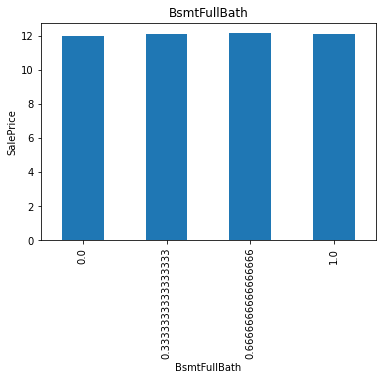

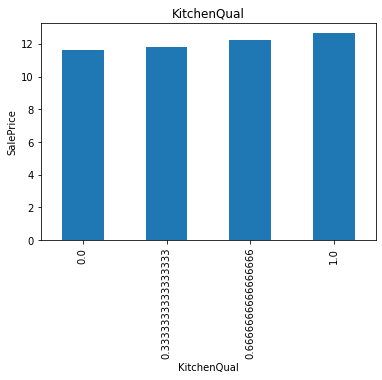

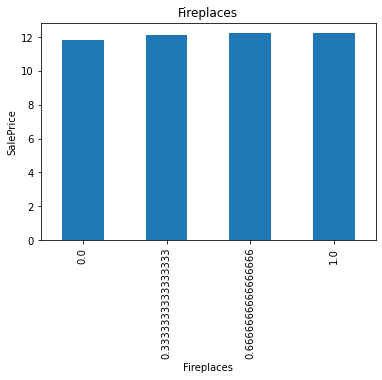

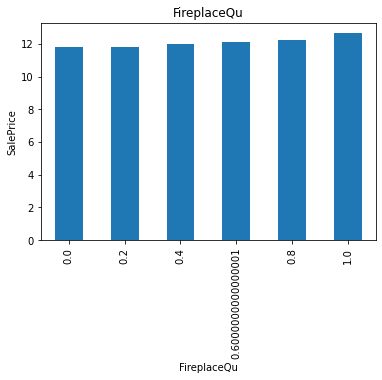

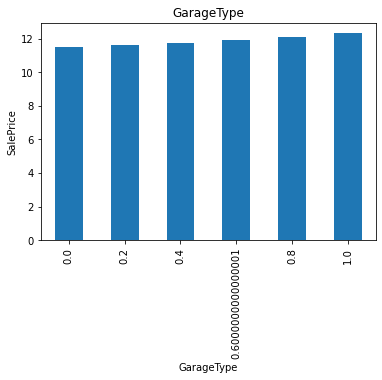

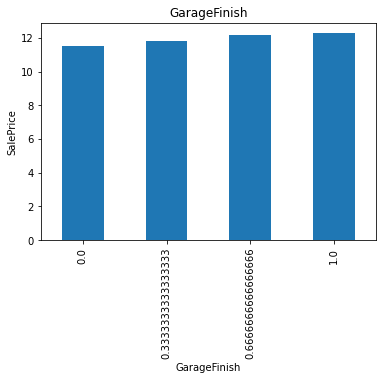

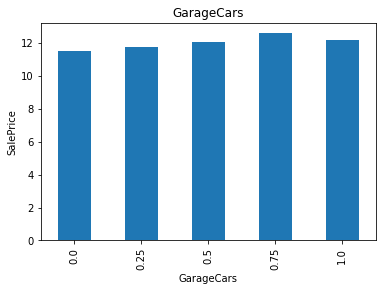

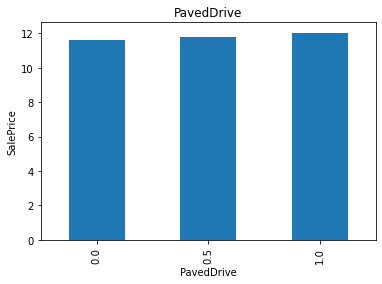

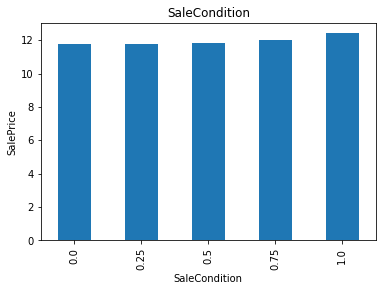

In [17]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]

dataset[discrete_feature].head()


## Lets Find the realtionship between these discrete features with the  Salesprice
for element in discrete_feature:
    data=dataset.copy()
    data.groupby(element)['SalePrice'].median().plot.bar()
    plt.xlabel(element)
    plt.ylabel('SalePrice')
    plt.title(element)
    plt.show()

## Step-7 Lets Explore the Continous Numerical Features using logarithmic transformation

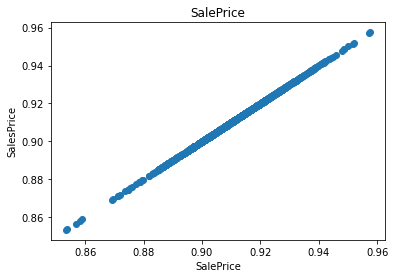

In [18]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

## Step-7 Find the outliers
Note: Numerical variables are usually of two types 1. Continous variable and Discrete Variables.
**What is Outliers:** They are data records that differ dramatically from all others, they distinguish themselves in one or more characteristics. In other words, an outlier is a value that escapes normality and can (and probably will) cause anomalies in the results obtained through algorithms and analytical systems.
**Why Find Outliers:** identify some of the feature data that wrongly represents the value and correlation with target data. This data is generally exceeding beyond the general range. For each and every feature we can find out the Outliers using BoxPlot method. 

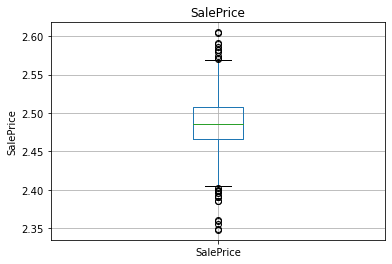

In [19]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

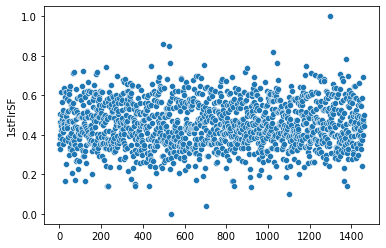

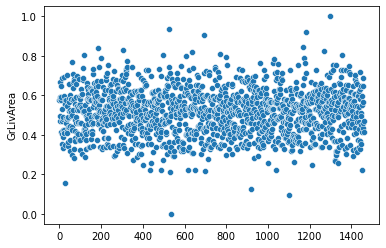

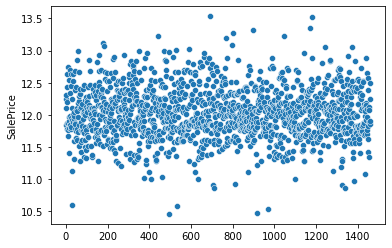

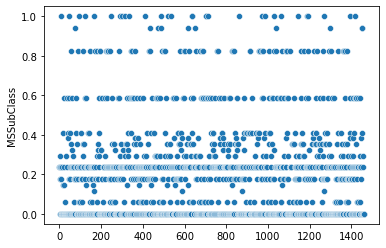

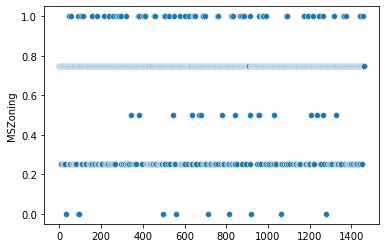

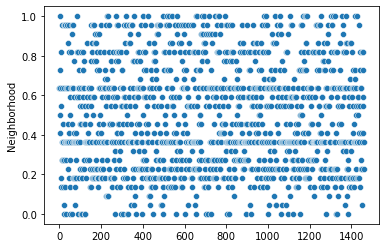

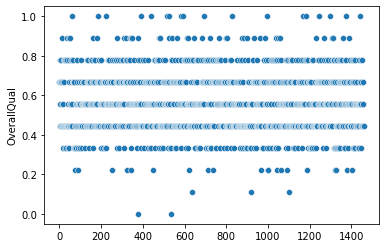

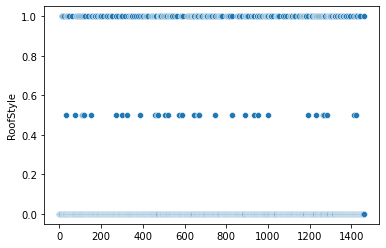

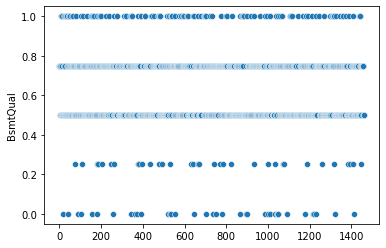

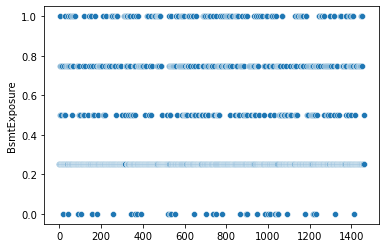

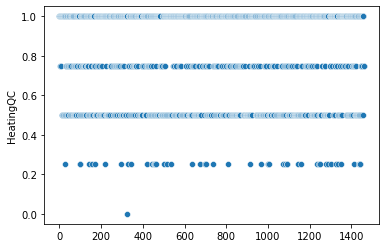

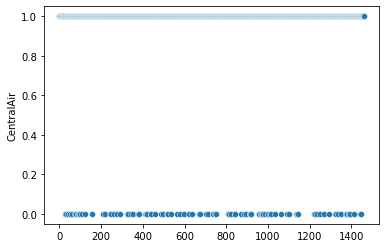

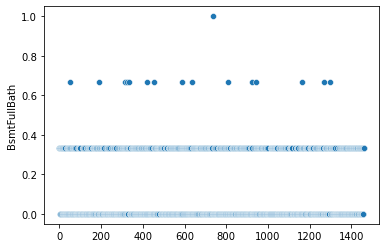

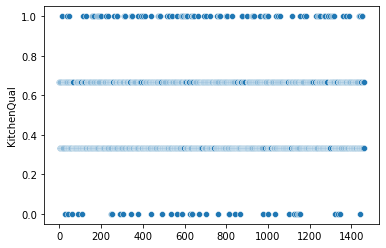

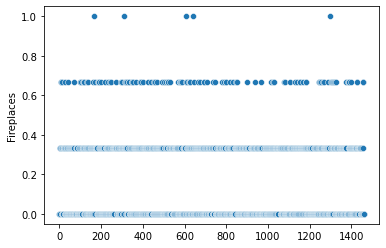

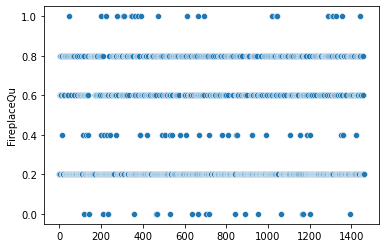

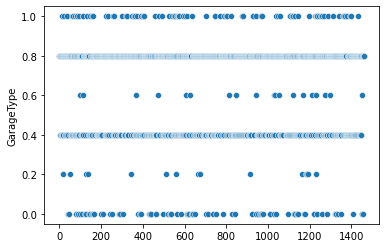

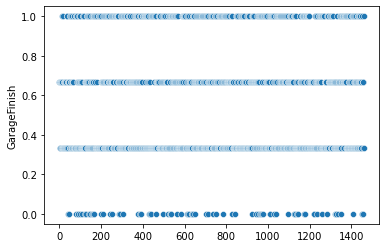

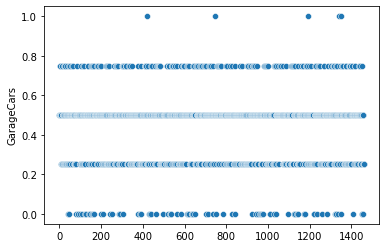

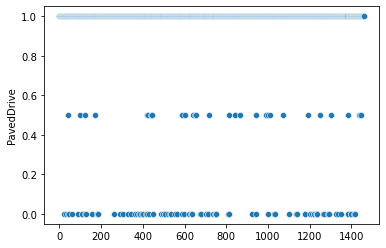

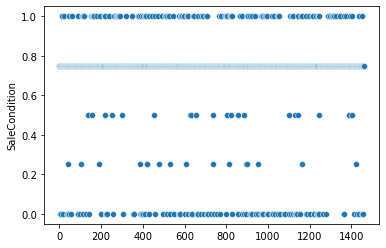

In [20]:
#plotting scatter-plot for a dataset to check outliers.

for i in continuous_feature:
    sns.scatterplot(data=dataset, x=dataset[i].index, y=i)
    plt.show()
    

for i in discrete_feature:
    sns.scatterplot(data=dataset, x=dataset[i].index, y=i)
    plt.show()

## Step-9 Find the Categorical Featuers and relationship with Salesprice
Note:-Features can be classified into two categories, ordinal(categorical) features and numerical features

In [21]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']

#see the top10 records for categorical fatures
print(dataset[categorical_features].head(5))

#analyse the categorical features
for feature in categorical_features:
    print('For the feature: {}, total number of categories: {} '.format(feature,len(dataset[feature].unique())))


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [22]:
#analyse the categorical features and the dependant feature: Salesprice
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Part-2: Data Cleaning and Data Preparation

### step1-split the data into test data set and train data set
The advantages of splitting the data into two sets is Data Training and Data Transformation can be held on an independent set of records, this will prevent data leakage and data anomaly.

In [23]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as IPython
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')
dataset=pd.read_csv('/Users/suravi.mandal/train.csv')



##split the data into test data set and train data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['SalePrice'],test_size=0.1,random_state=0)
#splitted the data into 10% as test data and 90% as train data
print(X_train.shape) 
print(X_test.shape)

(1314, 81)
(146, 81)


In [24]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step-2: Handle the Missing values in the feature data

### Handling the Categorical Features

In [25]:
##########For Categorical Features - replace the missing/null fields  with the label "Missing"
#view all the categorical features having missing values
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']
for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean()*100,4)))

Alley: 93.7671% missing values
MasVnrType: 0.5479% missing values
BsmtQual: 2.5342% missing values
BsmtCond: 2.5342% missing values
BsmtExposure: 2.6027% missing values
BsmtFinType1: 2.5342% missing values
BsmtFinType2: 2.6027% missing values
FireplaceQu: 47.2603% missing values
GarageType: 5.5479% missing values
GarageFinish: 5.5479% missing values
GarageQual: 5.5479% missing values
GarageCond: 5.5479% missing values
PoolQC: 99.5205% missing values
Fence: 80.7534% missing values
MiscFeature: 96.3014% missing values


In [26]:
#Explore the relationship with missing value features and Salesprice
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [27]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data
dataset=replace_cat_feature(dataset,features_nan)
#after replaceing, verify no missing values are there
print(dataset[features_nan].isnull().sum())

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64


In [28]:
#after replaceing, verify all missing values are laabelled with "Missing"
dataset.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,1,2008,WD,Normal,118000


In [29]:
#drop columns which have more than 90% missing values.
#train_df.drop(['Alley','PoolQC','MiscFeature'], axis=1, inplace=True)

### Handling the Categorical Features

In [30]:
#view all the categorical features having missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']
for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean()*100,4)))

LotFrontage: 17.7397% missing value
MasVnrArea: 0.5479% missing value
GarageYrBlt: 5.5479% missing value


In [33]:
#after replaceing, verify no missing values are there
print(dataset[numerical_with_nan].isnull().sum())

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64


In [34]:
dataset.head(20)  # to check that we create a new column to indicate if the column have value or missing value by indicating 0 or 1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,...,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,...,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,4,2008,WD,Abnorml,129900,0,0,0
9,10,190,RL,50.0,7420,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,1,2008,WD,Normal,118000,0,0,0


# Handling the Temporal features

In [35]:
## Temporal Variables (Date Time Variables)
## It is more important to learn how many year since the House was sold, so we convert from year stamp to mention how many year 
## by simply subtracting these dated with YearSold

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [36]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
#view the top 10 records data to understand the kind of values for these temporal features have now
dataset[year_feature].head(10)

,YearRemodAdd
0,5
1,31
2,6
3,36
4,8
5,14
6,2
7,36
8,58
9,58


# Handle Skewed Numerical Features

In [37]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [38]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


# Handle Rare Categorical Features

In [39]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
print(categorical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [40]:
##remove categorical variables that are present less than 1% of the observations
for feature in categorical_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [41]:
dataset.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,4.234107,9.186560,Pave,Missing,IR2,Lvl,AllPub,...,Shed,480,4,2009,WD,Normal,12.128111,1,0,0
96,97,20,RL,4.356709,9.236398,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,8,2006,WD,Normal,12.273731,0,0,0
97,98,20,RL,4.290459,9.298443,Pave,Missing,Reg,HLS,AllPub,...,Missing,0,5,2007,WD,Normal,11.458997,0,0,0
98,99,30,RL,4.442651,9.270965,Pave,Missing,Reg,Lvl,AllPub,...,Shed,400,5,2010,COD,Abnorml,11.326596,0,0,0


In [42]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)
    
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,1,60,3,4.174387,9.041922,1,2,0,1,1,...,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,...,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,...,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,...,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,...,2,0,12,2008,2,3,12.429216,0,0,0
5,6,50,3,4.442651,9.554993,1,2,1,1,1,...,1,700,10,2009,2,3,11.870600,0,0,0
6,7,20,3,4.317488,9.218705,1,2,0,1,1,...,2,0,8,2007,2,3,12.634603,0,0,0
7,8,60,3,4.234107,9.247829,1,2,1,1,1,...,1,350,11,2009,2,3,12.206073,1,0,0
8,9,50,1,3.931826,8.719317,1,2,0,1,1,...,2,0,4,2008,2,0,11.774520,0,0,0
9,10,190,3,3.912023,8.911934,1,2,0,1,1,...,2,0,1,2008,2,3,11.678440,0,0,0


# Feature Scaling
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step

In [43]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Id','SalePerice'] ]
#to check how many independednt features are there to be scaled
print('total number of scale features' , len(scaling_feature))
print(scaling_feature)

total number of scale features 83
['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'Screen

In [44]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [45]:
scaler.transform(dataset[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

# Data Transform

In [46]:
# transform the train and test dataset into normalised form, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)
#data.head(5)

### Export the tranformed data into X_train data set

In [47]:
data.to_csv('/Users/suravi.mandal/X_train.csv',index=False)

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [49]:
transformed_dataset=pd.read_csv('/Users/suravi.mandal/X_train.csv')
print(transformed_dataset.shape)
transformed_dataset.head()

(1460, 84)


,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [50]:
## drop dependent feature from X_train dataset
X_train=transformed_dataset.drop(['SalePrice'],axis=1)

## Export the tranformed data into Y_train data set

In [51]:
## Capture the dependent feature in y_train dataset
y_train=transformed_dataset[['Id','SalePrice']]

In [52]:
y_train

,Id,SalePrice
0,1,12.247694
1,2,12.109011
2,3,12.317167
3,4,11.849398
4,5,12.429216
...,...,...
1455,1456,12.072541
1456,1457,12.254863
1457,1458,12.493130
1458,1459,11.864462


# Part-3 Feature Selection

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


### Apply Feature Selection with the Lasso Regression model, to select a suitable alpha (equivalent of penalty),he bigger the alpha the less features that will be selected.

### Use the selectFromModel object from sklearn, which will select the features which coefficients are non-zero


feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [54]:
#Visualising features that were kept by the lasso regularisation
feature_sel_model.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False])

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler


# make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]
#print('test123',sel_.estimator_)

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))



total features: 83
selected features: 22


In [56]:
selected_feat

Index(['Id', 'MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual',
       'YearRemodAdd', 'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'PavedDrive', 'SaleCondition'],
      dtype='object')

In [57]:
X_train=X_train[selected_feat]
X_train.to_csv('/Users/suravi.mandal/X_train.csv',index=False)
y_train.to_csv('/Users/suravi.mandal/y_train.csv',index=False)

selected = pd.merge(X_train, y_train)
selected.to_csv('/Users/suravi.mandal/selected.csv',index=False)

In [58]:
print('total number of selected features',X_train.shape)

total number of selected features (1460, 22)


## Conclusion: The same data processing can be applied multiple times on the data file and everytime it will select the same features as sele cted features.
### When we run this script on raw data and when we run the script on transformed data, we observe that the graph plots are less scattered for the transformed data, that means the transformed data are more normalised and fit for machine learning application